## Нелинейные вычислительные процессы. Лабораторная работа 1. Петров Сергей.

$\underline{\text{Теоретическая часть}}$

Необходимо проанализировать схему, для решения уравнения переноса $u_t + \lambda u_x =0, \lambda = 1$ на следующем сеточном шаблоне, $\sigma = 0.4$:

![title](1.jpg)

Общий вид схемы: $u_m^{n+1} = \sum \limits_{\mu, \nu} \alpha _{\mu}^{\nu} (\tau,h) u^{n+\nu}_{m+\mu}$

В моем случае: $u_m^{n+1} = \alpha_{-2}^{0} u_{m-2}^n + \alpha_{-1}^{0}u_{m-1}^n + \alpha_{0}^{0}u_m^n + \alpha_{1}^{-1}u_{m+1}^{n-1}$

Запишем ошибку аппроксимации $\delta_{r} = L_{\tau,h}[u]^{\tau,h} - F_{\tau,h}$, где $L_{\tau,h}[u]^{\tau,h}$ - значение точного решения в узлах сетки, подставленное в разностный оператор, а $F_{\tau,h}$ - значение правой части в узлах сетки (оно равно нулю в нашем случае).

$\delta_{r} = L_{\tau,h}[u]^{\tau,h} - F_{\tau,h} \sim \alpha_{-2}^{0} u(x_{m-2}, t^n) + \alpha_{-1}^{0}u(x_{m-1}, t^{n}) + \alpha_{0}^{0}u(x_m,t^n) + \alpha_{1}^{-1}u(x_{m+1},t^{n-1}) - u(x_m,t^{n+1}) $

Далее раскладываем в ряд Тейлора относительно точки $(x_m,t^n)$:

$\delta_r \sim \alpha_{-2}^{0} (u - 2h u_x +\frac{4h^2}{2}u_{xx} - \frac{8h^3}{6} u_{xxx} + O(h^4))  +\alpha_{-1}^{0}(u - h u_x +\frac{h^2}{2}u_{xx} - \frac{h^3}{6} u_{xxx} + O(h^4))
+ \alpha_{0}^{0}u +
  \alpha_{1}^{-1}(u + h u_x - \tau u_t + \frac{h^2}{2}u_{xx} - \tau h u_{xt} + \frac{\tau^2}{2} u_{tt} +\frac{h^3}{6}u_{xxx} - \frac{h^2 \tau}{2}u_{xxt} + \frac{h \tau^2}{2}u_{xtt} - \frac{\tau^3}{6}u_{ttt} + O(\tau^4,h^4) ) - (u +\tau u_{t} +\frac{\tau^2}{2} u_{tt} + \frac{\tau^3}{6}u_{ttt} + O(\tau^4)) $

Переходим к производным только по пространству пользуясь серией равенств: $u_{tt}= -\lambda u_{tx} = \lambda^2 u_{xx}$, $u_{ttt} = -\lambda u_{ttx} = \lambda^2 u_{txx} = -\lambda^3 u_{xxx}$. Выделяем отдельно некоторые слагаемые $(\sigma = \frac{\lambda \tau}{h}=\frac{\tau}{h})$:

$\delta_r \sim u(\alpha_{-2}^{0} + \alpha_{-1}^{0}+\alpha_{0}^{0}+ \alpha_{1}^{-1} - 1)+ u_{x}h(-2 \alpha_{-2}^0-\alpha_{-1}^0+\alpha_1^{-1}(1+\sigma)+\sigma) + u_{xx}\frac{h^2}{2}(4\alpha_{-2}^{0}+\alpha_{-1}^{0}+\alpha_{1}^{-1}(1+2\sigma+\sigma^2) - \sigma^2)+$

$$+ u_{xxx}\frac{h^3}{6}(-8 \alpha_{-2}^0 -\alpha_{-1}^{0} +\alpha_{1}^{-1}(1+3\sigma +3 \sigma^2+\sigma^{3})+\sigma^3    ) +O(\tau^4, h^4) $$

Поскольку при фиксированном $\sigma$ и $\lambda$ выполнено $\tau \sim h$, то $O(\tau^4,h^4)=O(h^4)$

Также необходимо учесть, что $Lu-F=u_t-\lambda u_x \sim \frac{u}{\tau}$, а $L_{\tau,h}[u]^{\tau,h} - F_{\tau,h} \sim u$. Поэтому, чтобы размерности реальных и сеточных ошибок были одинаковыми, необходиомо разделить последнее уравнение на $\tau$.

Введем обозначения: $$\delta_0 = \alpha_{-2}^{0} + \alpha_{-1}^{0}+\alpha_{0}^{0}+ \alpha_{1}^{-1} - 1$$
$$\delta_1 = -2 \alpha_{-2}^0-\alpha_{-1}^0+\alpha_1^{-1}(1+\sigma)+\sigma $$
$$\delta_2 = 4\alpha_{-2}^{0}+\alpha_{-1}^{0}+\alpha_{1}^{-1}(1+2\sigma+\sigma^2) - \sigma^2$$
$$\delta_3 = -8 \alpha_{-2}^0 -\alpha_{-1}^{0} +\alpha_{1}^{-1}(1+3\sigma +3 \sigma^2+\sigma^{3})+\sigma^3     $$

Тогда полная аппроксимационная ошибка запишется в виде:
$$ \delta_r = \underbrace{\frac{ \delta_0}{\tau}u}_{O(\frac{1}{h})} + \underbrace{\frac{h \delta_1}{\tau}u_x}_{O(1)} + \underbrace{\frac{h^2 \delta_2}{2\tau} u_{xx}}_{O(h)} + \underbrace{\frac{h^3 \delta_3}{6\tau} u_{xxx}}_{O(h^2)} +O(h^3) $$

Чтобы разностная схема аппроксимировала уравнение, необходимо, чтобы $\delta_0 = 0$.

Чтобы получить первый порядок аппроксимации ($O(h)$). Нужно дополнительно приравнять $\delta_1$ к нулю.

$\begin{equation*}
\begin{cases}
   \delta_0 = \alpha_{-2}^{0} + \alpha_{-1}^{0}+\alpha_{0}^{0}+ \alpha_{1}^{-1} - 1 = 0
   \\
   \delta_1 = -2 \alpha_{-2}^0-\alpha_{-1}^0+\alpha_1^{-1}(1+\sigma)+\sigma=0
 \end{cases} 
 \end{equation*}$

Получим двухпараметрическое семейство схем первого порядка аппроксимации, приняв $\alpha_{0}^{0}$ и $\alpha_{-2}^0$ за свободные переменные.

Получаем, что: 
$\begin{equation*}
\begin{cases}
   \alpha_1^{-1}= \frac{1-\sigma}{2+\sigma} + \frac{1}{2+\sigma}\alpha_{-2}^{0} - \frac{1}{2+\sigma} \alpha_{0}^{0}
   \\
   \alpha_{-1}^{0}= \frac{2 \sigma +1}{2+\sigma} - \frac{3+\sigma}{2+\sigma}\alpha_{-2}^{0} - \frac{1+ \sigma}{2+\sigma} \alpha_{0}^{0}
 \end{cases} 
 \end{equation*}$
 
 В нашем случае $\sigma = 0.4$:
 
$\begin{equation*}
\begin{cases}
   \alpha_1^{-1}= \frac{1}{4} + \frac{5}{12}\alpha_{-2}^{0} - \frac{5}{12} \alpha_{0}^{0}
   \\
   \alpha_{-1}^{0}= \frac{3}{4} - \frac{17}{12}\alpha_{-2}^{0} - \frac{7}{12} \alpha_{0}^{0}
 \end{cases} 
 \end{equation*}$
 

Получим множество монотонных по Фридрихсу схем первого порядка аппроксимации. Для этого просто решим систему неравенств относительно свободных переменных:
$\begin{equation*}
\begin{cases}
   \alpha_1^{-1}= \frac{1}{4} + \frac{5}{12}\alpha_{-2}^{0} - \frac{5}{12} \alpha_{0}^{0} \ge 0
   \\
   \alpha_{-1}^{0}= \frac{3}{4} - \frac{17}{12}\alpha_{-2}^{0} - \frac{7}{12} \alpha_{0}^{0} \ge 0
   \\
   \alpha_{-2}^{0} \ge 0
   \\
   \alpha_{0}^{0} \ge 0
 \end{cases} 
 \end{equation*}
 $

Последняя система равносильна следующей 
$\begin{equation*}
\begin{cases}
   \alpha_{-2}^{0} \ge \alpha_{0}^0 - \frac{3}{5}
   \\
   \alpha_{-2}^{0} \le -\frac{7}{17}\alpha_{0}^0 + \frac{9}{17}
   \\ 
   \alpha_{-2}^{0} \ge 0
   \\
   \alpha_{0}^{0} \ge 0
 \end{cases} 
 \end{equation*}$

Построим эту область в осях $(\alpha_{0}^{0},\alpha_{-2}^{0}):$

![title](2.jpg)

Четырехугольник ABCD - граница области монотонности схемы.

Теперь получим вид однопараметрического семейства схем второго порядка($O(h^2)$), для этого запишем новую систему уравнений, которую решим относительного одного из параметров($\alpha_{0}^{0}$):
$\begin{equation*}
\begin{cases}
   \delta_0 = \alpha_{-2}^{0} + \alpha_{-1}^{0}+\alpha_{0}^{0}+ \alpha_{1}^{-1} - 1 = 0
   \\
   \delta_1 = -2 \alpha_{-2}^0-\alpha_{-1}^0+\alpha_1^{-1}(1+\sigma)+\sigma=0
   \\
   \delta_2 = 4\alpha_{-2}^{0}+\alpha_{-1}^{0}+\alpha_{1}^{-1}(1+2\sigma+\sigma^2) - \sigma^2 = 0
 \end{cases} 
 \end{equation*} $

Подставляем ранее найденное двухпараметрическое семейство для первого порядка в третье уравнение и получаем:
$$ \alpha_{-2}^0 = \frac{7}{17} \alpha_{0}^{0} - \frac{27}{85} $$
На рисунке прямая, соответствующая схемам 2 порядка выделена зеленым цветом:

![title](3.jpg)

Видем, что она не пересекает область монотонности схемы, что не противоречит теореме Годунова. 

Теперь получим единственную схему третьего порядка аппроксимации, решив систему уравнений:
$\begin{equation*}
\begin{cases}
   \delta_0 = \alpha_{-2}^{0} + \alpha_{-1}^{0}+\alpha_{0}^{0}+ \alpha_{1}^{-1} - 1 = 0
   \\
   \delta_1 = -2 \alpha_{-2}^0-\alpha_{-1}^0+\alpha_1^{-1}(1+\sigma)+\sigma=0
   \\
   \delta_2 = 4\alpha_{-2}^{0}+\alpha_{-1}^{0}+\alpha_{1}^{-1}(1+2\sigma+\sigma^2) - \sigma^2 = 0
   \\
   \delta_3 = -8 \alpha_{-2}^0 -\alpha_{-1}^{0} +\alpha_{1}^{-1}(1+3\sigma +3 \sigma^2+\sigma^{3})+\sigma^3 = 0
 \end{cases} 
 \end{equation*}$
 
 Решаем и получаем единственную точку: ($- \frac{27}{425}, \frac{12}{25}, \frac{108}{175}, -\frac{4}{119}$). На рисунке это точка E (она попала на зеленую прямую, так и должно быть, посхольку схема третьего порядка обеспечивает и второй порядок тоже).

![title](4.jpg)

Среди положительных по Фридрихсу (монотонных, мажорантных) схем аналитический вид для наиболее точной схемы с минимальной «аппроксимационной вязкостью» соответствует точке C красного четырехугольника.Координаты остальных вершин четырехугольника можно найти. Чтобы найти схему наиболее приближенную к множеству монотонных схем, нужно найти координаты основания перпендикуляра, опущенного из точки C на зеленую прямую. На следующем рисунке эта схема соответствует синей точке F:

![title](5.jpg)

Наглядно представим полученные нами результаты в следующей таблице:
![title](6.jpg)

$\underline{\text{Практическая часть}}$

Необходимо решить краевую задачу:
$\begin{equation*}
\begin{cases}
   u_t + \lambda u_x = 0, \lambda = 1 (t > 0, 0<x \le 2 ),
   \\
   u(0,x) = \varphi(x) (0<x \le 2),
   \\
   u(t,0) = 0 (0 < t \le 100 \tau).
 \end{cases} 
 \end{equation*}
 $


Функция $\varphi(x)$ определяется как "ступенька": 
$\begin{equation*}
\varphi(x) = 
\begin{cases}
   1, \text{при $x \in [0.4,0.6]$},
   \\
   0, \text{иначе}.
 \end{cases} 
 \end{equation*}$ 


Вводим равномерную сетку на отрезке $[0,2]$ с числом узлов равным 201 ($h = 0.01$). Шаг по времени выбирается согласно введенному числу Куранта: $\sigma = \dfrac{\lambda \tau}{h} \Rightarrow \tau = \dfrac{\sigma h}{\lambda} = 0.004$.

Программа будет написана на языке $\textbf{python}$.

Напишем функцию, котороя будет принимать на вход 4 коэффициента: $\alpha_{-2}^{0}, \alpha_{-1}^{0}, \alpha_{0}^{0}, \alpha_{1}^{-1} $ и по ним вычислять значение в следующем по времени узле по формуле $u_m^{n+1} = \alpha_{-2}^{0} u_{m-2}^n + \alpha_{-1}^{0}u_{m-1}^n + \alpha_{0}^{0}u_m^n + \alpha_{1}^{-1}u_{m+1}^{n-1}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#defining phi function
num_space_steps = 200
space_step = 2.0 / num_space_steps
time_step = 0.4 * space_step
num_time_steps = 100

def phi(x):
    value = 0.0
    if ((x >= 0.4) and (x <= 0.6)):
        value = 1.0
    return value        

In [30]:
print(space_step)

0.01


In [31]:
print(time_step)

0.004


In [34]:
#defining grid funcion
u = np.zeros(num_space_steps)

In [35]:
#put initial value
for i in range (0, num_space_steps):
    u[i] = phi(i*space_step)   

Поскольку схема двухуровневая, то первый шаг будем делать просто по схеме "правый уголок", а затем только использовать конкретную схему из полученных в теоретической части.

In [36]:
#calculations
def calc(a1,a2,a3,a4,u,step):
    u_previous = np.zeros(num_space_steps)
    u_current = np.zeros(num_space_steps)
    u_current = u.copy()
    u_new = np.zeros(num_space_steps)
    u_new[0] = 0 #boundary conditions
    for j in range (1, num_space_steps):
        u_new[j] = 0.8*u_current[j] + 0.2*u_current[j-1]
    u_previous = u_current.copy()
    u_current = u_new.copy()
    #k = 0
    for i in range (1, step):
        #k += 1
        u_new[0] = 0 #boundary conditions
        #u_new[1] = 0.6*u_current[1] + 0.4*u_current[0]
        for j in range (1, num_space_steps):
            u_new[j] = a1*u_previous[j-1] + a2*u_previous[j] + a3*u_current[j] + a4*u_current[j-1]
        #u_new[num_space_steps-1] =  0.6*u_current[num_space_steps-1] + 0.4*u_current[num_space_steps-2]
        u_previous = u_current.copy()   
        u_current = u_new.copy()
    return u_current    

In [2]:
def print_calc(a1,a2,a3,a4,step):
    x_period = np.linspace(0,2,num_space_steps)
    y_period = calc(a1,a2,a3,a4,u,step)
    plt.plot(x_period, y_period)
    x_exact = np.linspace(0,2,num_space_steps)
    y_exact = np.zeros(num_space_steps)
    for i in range(0,num_space_steps):
        y_exact[i] = phi(x_exact[i] - step*time_step)
    plt.plot(x_exact, y_exact)
    
    plt.show()

In [3]:
print_calc(0.0,2.0/5,3.0/5,0.0,num_time_steps/2)
print_calc(0.0,2.0/5,3.0/5,0.0,num_time_steps)

NameError: global name 'calc' is not defined

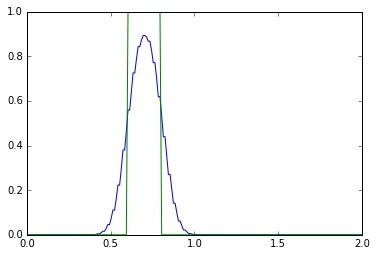

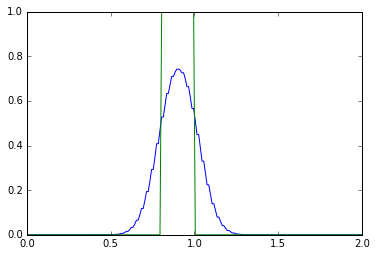

In [39]:
print_calc(0.0,3.0/4,0.0,1.0/4,num_time_steps/2)
print_calc(0.0,3.0/4,0.0,1.0/4,num_time_steps)

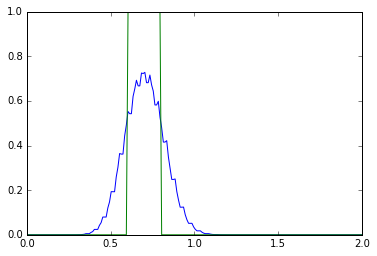

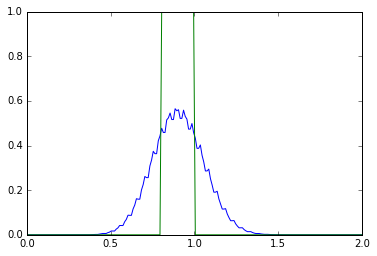

In [40]:
print_calc(9.0/17,0.0,0.0,8.0/17,num_time_steps/2)
print_calc(9.0/17,0.0,0.0,8.0/17,num_time_steps)

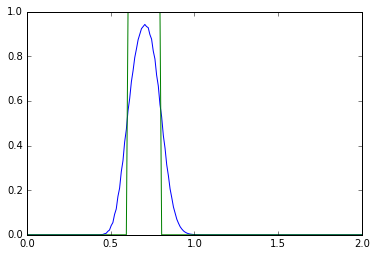

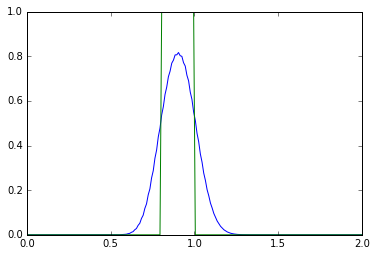

In [41]:
print_calc(1.0/5,0.0,4.0/5,0.0,num_time_steps/2)
print_calc(1.0/5,0.0,4.0/5,0.0,num_time_steps)

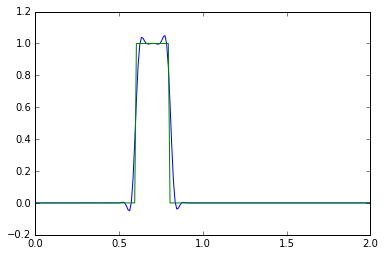

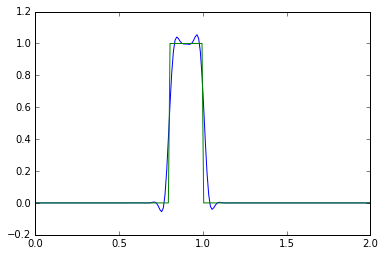

In [42]:
print_calc(-51.0/845,398.0/845,528.0/845,-6.0/169,num_time_steps/2)
print_calc(-51.0/845,398.0/845,528.0/845,-6.0/169,num_time_steps)

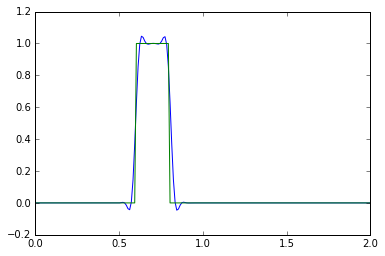

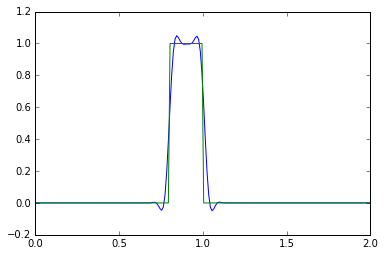

In [43]:
print_calc(-27.0/425,12.0/25,108.0/175,-4.0/119,num_time_steps/2)
print_calc(-27.0/425,12.0/25,108.0/175,-4.0/119,num_time_steps)

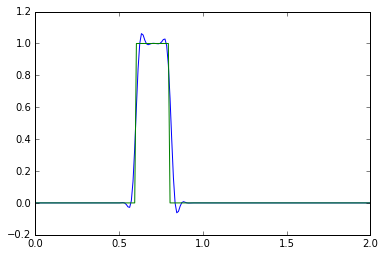

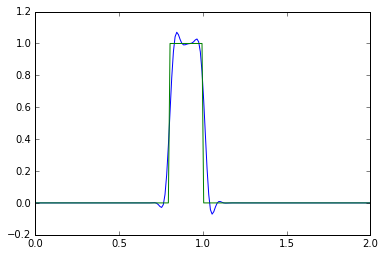

In [44]:
print_calc(-6.0/85,1.0/2,3.0/5,-1.0/34,num_time_steps/2)
print_calc(-6.0/85,1.0/2,3.0/5,-1.0/34,num_time_steps)

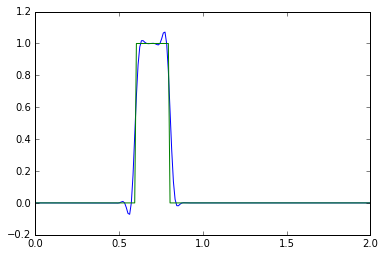

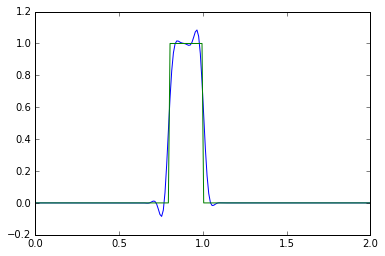

In [45]:
print_calc(-1.0/20,53.0/120,13.0/20,-1.0/24,num_time_steps/2)
print_calc(-1.0/20,53.0/120,13.0/20,-1.0/24,num_time_steps)

Вообще, согласно теореме Годунова, не существует монотонных схем второго порядка и выше, но мы можем построить такую схему, как гибридную, с переменными коэффициентами.

In [46]:
def calc_hybrid(a1,a2,a3,a4,b1,b2,b3,b4,u,step):
    u_previous = np.zeros(num_space_steps)
    u_current = np.zeros(num_space_steps)
    u_current = u.copy()
    u_new = np.zeros(num_space_steps)
    u_new[0] = 0 #boundary conditions
    for j in range (1, num_space_steps):
        u_new[j] = 0.8*u_current[j] + 0.2*u_current[j-1]
    u_previous = u_current.copy()
    u_current = u_new.copy()
    for i in range (1, step):
        u_new[0] = 0 #boundary conditions
#         u_new[1] = 0.6*u_current[j] + 0.4*u_current[j-1]
        for j in range (1, num_space_steps):
            calc = a1*u_previous[j-1] + a2*u_previous[j] + a3*u_current[j] + a4*u_current[j-1]
            if ((min(u_current[j-1],u_previous[j-1]) <= calc) and (max(u_current[j-1],u_previous[j-1]) >= calc)):
                u_new[j] = calc
            else:
                u_new[j] = b1*u_previous[j-1] + b2*u_previous[j] + b3*u_current[j] + b4*u_current[j-1]

#         u_new[num_space_steps-1] =  0.6*u_current[num_space_steps-1] + 0.4*u_current[num_space_steps-2]
        u_previous = u_current.copy()   
        u_current = u_new.copy()
    return u_current    

In [4]:
def print_calc_hybrid(a1,a2,a3,a4,b1,b2,b3,b4,step):
    x_period = np.linspace(0,2,num_space_steps)
    y_period = calc_hybrid(a1,a2,a3,a4,b1,b2,b3,b4,u,step)
    plt.plot(x_period, y_period)
    x_exact = np.linspace(0,2,num_space_steps)
    y_exact = np.zeros(num_space_steps)
    for i in range(0,num_space_steps):
        y_exact[i] = phi(x_exact[i] - step*time_step)
    plt.plot(x_exact, y_exact)
    
    plt.show()

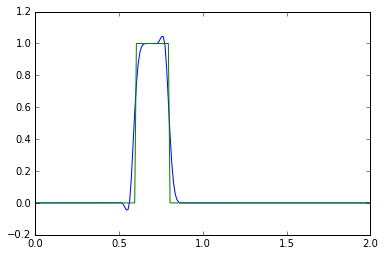

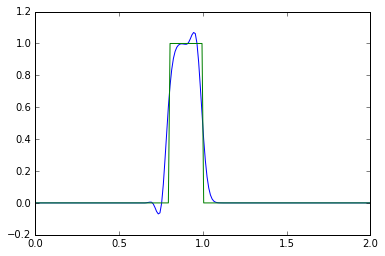

In [48]:
print_calc_hybrid(-3.0/340, 13.0/40, 3.0/4, -9.0/136, -31.0/340, 67.0/120, 11.0/20, -7.0/408, num_time_steps/2)
print_calc_hybrid(-3.0/340, 13.0/40, 3.0/4, -9.0/136, -31.0/340, 67.0/120, 11.0/20, -7.0/408, num_time_steps)

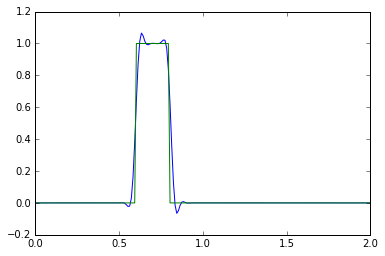

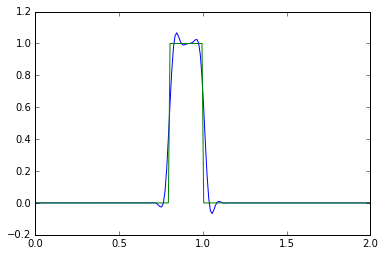

In [49]:
print_calc_hybrid(-27.0/425,12.0/25,108.0/175,-4.0/119, -31.0/340, 67.0/120, 11.0/20, -7.0/408, num_time_steps/2)
print_calc_hybrid(-27.0/425,12.0/25,108.0/175,-4.0/119, -31.0/340, 67.0/120, 11.0/20, -7.0/408, num_time_steps)

Теперь построим гибридную схему с использованием трех:

In [50]:
def calc_hybrid_3(a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,u,step):
    u_previous = np.zeros(num_space_steps)
    u_current = np.zeros(num_space_steps)
    u_current = u.copy()
    u_new = np.zeros(num_space_steps)
    u_new[0] = 0 #boundary conditions
    for j in range (1, num_space_steps):
        u_new[j] = 0.6*u_current[j] + 0.4*u_current[j-1]
    u_previous = u_current.copy()
    u_current = u_new.copy()
    for i in range (1, step):
        u_new[0] = 0 #boundary conditions
        u_new[1] = 0.6*u_current[j] + 0.4*u_current[j-1]
        for j in range (2, num_space_steps-1):
            calc1 = a1*u_current[j-2] + a2*u_current[j-1] + a3*u_current[j] + a4*u_previous[j+1]
            if ((min(u_current[j-1],u_current[j]) <= calc1) and (max(u_current[j-1],u_current[j]) >= calc1)):
                u_new[j] = calc1
            else:
                calc2 = b1*u_current[j-2] + b2*u_current[j-1] + b3*u_current[j] + b4*u_previous[j+1]
                if ((min(u_current[j-1],u_current[j]) <= calc2) and (max(u_current[j-1],u_current[j]) >= calc2)):
                    u_new[j] = calc2
                else:
                    u_new[j] = c1*u_current[j-2] + c2*u_current[j-1] + c3*u_current[j] + c4*u_previous[j+1]
                    
        u_new[num_space_steps-1] =  0.6*u_current[num_space_steps-1] + 0.4*u_current[num_space_steps-2]
        u_previous = u_current.copy()   
        u_current = u_new.copy()
    return u_current    

In [51]:
def print_calc_hybrid_3(a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,step):
    x_period = np.linspace(0,2,num_space_steps)
    y_period = calc_hybrid_3(a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,u,step)
    plt.plot(x_period, y_period)
    x_exact = np.linspace(0,2,num_space_steps)
    y_exact = np.zeros(num_space_steps)
    for i in range(0,num_space_steps):
        y_exact[i] = phi(x_exact[i] - step*time_step)
    plt.plot(x_exact, y_exact)
    
    plt.show()

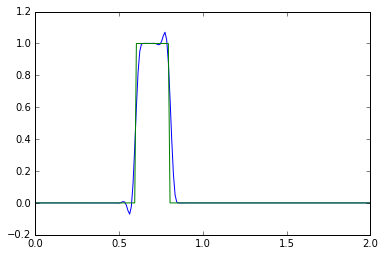

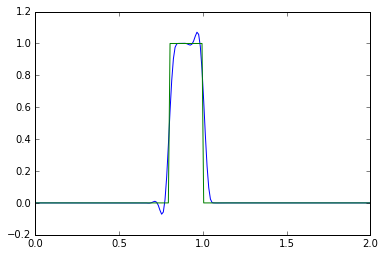

In [52]:
print_calc_hybrid_3(-27.0/425,12.0/25,108.0/175,-4.0/119, -31.0/340,\
                    67.0/120, 11.0/20, -7.0/408,-3.0/340, 13.0/40, 3.0/4, -9.0/136, num_time_steps/2)
print_calc_hybrid_3(-27.0/425,12.0/25,108.0/175,-4.0/119, -31.0/340,\
                    67.0/120, 11.0/20, -7.0/408,-3.0/340, 13.0/40, 3.0/4, -9.0/136, num_time_steps)